In [16]:
#Import Necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lets create dummy data
np.random.seed(42) # for reproducibility

#Create mean for Gaussian Distribution
mean1 = [1,1]
mean2 = [5,5]

#Covariance matrix for Gausian Distribution 1 & 2
cov1 = [[1, 0.5], [0.5, 1]]
cov2 = [[1, -0.5], [-0.5, 1]]

#Generating data for 1st & 2nd Gaussian Distribution
data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

#Create a single data by combinibg above 2
data = np.vstack((data1, data2))

In [3]:
data

array([[ 0.63896508,  0.50070077],
       [-0.32242966,  1.2006002 ],
       [ 1.31985125,  1.08571429],
       [-0.75135578,  0.01607895],
       [ 1.13529672,  1.67785677],
       [ 1.63419637,  1.16846662],
       [ 1.74709465, -0.1661856 ],
       [ 2.77496643,  2.2126789 ],
       [ 1.72001381,  2.03426115],
       [ 2.49252377,  1.08022007],
       [-0.15640092, -0.38217722],
       [ 1.65389295,  0.22914477],
       [ 1.41598797,  1.52691056],
       [ 1.80894067,  2.18463869],
       [ 1.66601524,  1.37432149],
       [ 0.59495412,  2.4472323 ],
       [ 1.5405444 ,  0.48283348],
       [ 0.89807704, -0.32276661],
       [ 1.79895388, -0.16071624],
       [ 2.05181224,  2.24867348],
       [ 0.27478504,  0.44615332],
       [ 1.2507062 ,  0.9496025 ],
       [ 2.64035971,  1.9205155 ],
       [ 0.87036376,  1.92748599],
       [ 1.58393791, -0.17910225],
       [ 0.91187619,  0.52679391],
       [ 1.2803935 ,  1.89206979],
       [-0.35851184,  0.57276828],
       [ 1.88138988,

In [18]:
#Initialize param for two gaussian components
#Number of Gaussian COmponents (cluster we want to fit in the data)
num_compunents = 2

In [19]:
#Inializing th`e mean, covariances, priors randomly for the specified components
np.random.seed(42)
#Initializing the mean randomly for each components
mean = np.random.randn(num_compunents, data.shape[1])
#Initialize covariances as identity matrices for each matrices
covariances = np.array([np.eye(data.shape[1])] * num_compunents)
#Initialize the prior weights uniformly for each components
priors = np.ones(num_compunents)/ num_compunents

In [20]:
mean

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986]])

In [21]:
covariances

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [22]:
priors

array([0.5, 0.5])

In [23]:
#Define Gaussian PDF function
def gaussian_pdf(x, mean, cov):
    #Determine the dimensions for the input vector x
    d = x.shape[0]
    
    #Calculate the constant term in the Gaussian PDF formula
    constant = 1/((1 * np.pi) * (d/2) * np.linalg.det(cov)**0.5)
    
    #Calculate the exponent term in the Gaussian PDF formula
    exp_term = np.exp(-0.5 * np.dot(np.dot((x-mean).T, np.linalg.inv(cov)), (x-mean)))
    
    #Calculate the overall Gaussian PDF value by muliplying the const and the exp. term
    return constant * exp_term

In [24]:
#Expectation Maximation Algorithm
num_iterations = 10
for i in range(num_iterations):
    #E-Step: calculate the responsibilities (Posterior probability)
    responsibilities = np.zeros((len(data), num_compunents))
    for j in range(num_compunents):
        for k,x in enumerate(data):
            responsibilities[k, j] = priors[j] * gaussian_pdf(x, mean[j], covariances[j])
            
    responsibilities /= responsibilities.sum(axis=1, keepdims = True)
    #M-Step: Update the mean, covariances and priors
    
    for j in range(num_compunents):
        total_responsibilities = np.sum(responsibilities[:, j])
        mean[j] = np.sum(data * responsibilities[:, j][:, None], axis=0)/total_responsibilities
        covariances[j] = np.dot((responsibilities[:, j][:, None] * (data - mean[j])).T, (data-mean[j])) / total_responsibilities
        priors[j] = total_responsibilities/len(data)

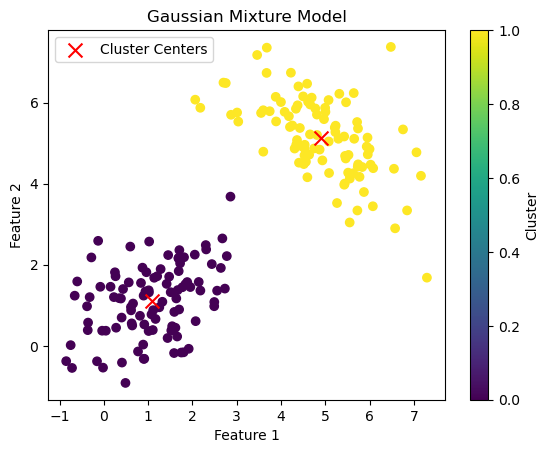

In [25]:
#Plot the clustered data
plt.scatter(data[:, 0], data[:, 1], c=responsibilities.argmax(axis=1), cmap = 'viridis')
plt.scatter(mean[:, 0], mean[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

## GMM using Sklearn

In [26]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [28]:
#Load iris Dataset
iris = datasets.load_iris()

#Considering only first 2 features for visualization
X = iris.data[:, :2]

In [29]:
#Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=2, random_state=42)

In [30]:
#Predict the labels
labels = gmm.predict(X)

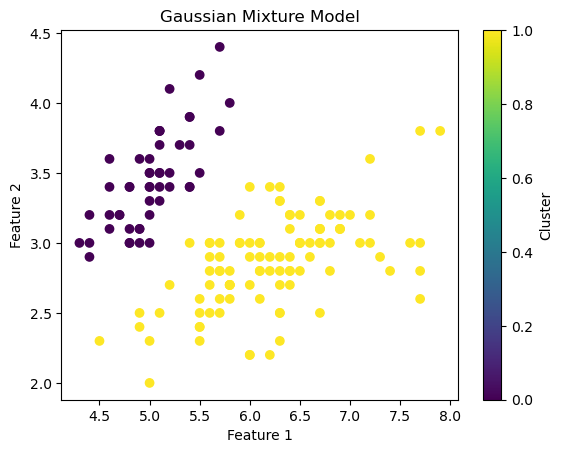

In [31]:
#Plot the points with their assigned clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()